# <center>A simple random forest approach to predict fish survival</center> #
<center><img src="jup.png" style="height: 75px;" /> + <img src="salmon.jpg" style="height: 75px;" /> + <img src="rf.png" style="height: 75px;" /></center>


<center>(with like 20 lines of code!)</center>

### Import Necessary Python Packages (Pandas, NumPy, Scikit-learn)

In [1]:
from fish_import import *

%matplotlib inline

### Introducing the Juvenile Fish Collector

In [2]:
IFrame('https://caltopo.com/m/SEN5', width=700, height=350)

### Import CSV that I exported from snowflake

In [20]:
fish = pd.read_csv('fish_capture.csv')
fish.head(7)

,TAG_CODE,CAPTURE_CODE,MARCH_FLAG,APR_FLAG,MAY_FLAG,JUNE_FLAG,JULY_FLAG,AUGUST_FLAG,SEP_FLAG,SOCKEYE_FLAG,HATCHERY_REARED,RELEASE_SITE_FLAG,LENGTH_MM
0,384.3B23949C61,0,0,0,0,1,0,0,0,0,0,0,129
1,384.3B23954899,0,0,0,1,0,0,0,0,0,0,0,117
2,384.3B23957A31,0,0,0,0,1,0,0,0,0,0,0,124
3,384.3B2395B170,1,0,0,0,1,0,0,0,0,0,0,131
4,384.3B2395B963,0,0,0,0,1,0,0,0,0,0,0,115
5,384.3B2395C0EA,1,0,0,0,1,0,0,0,0,0,0,119
6,384.3B2395C151,0,0,0,1,0,0,0,0,0,0,0,127


Text(0.5, 1.0, 'Fish Counts | Not Captured vs Captured')

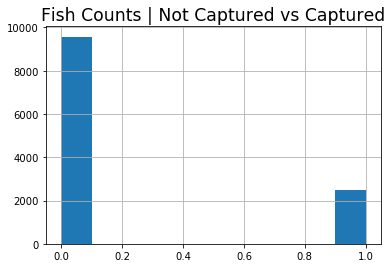

In [22]:
fish['CAPTURE_CODE'].hist()
plt.title('Fish Counts | Not Captured vs Captured',fontsize='xx-large')

## <center> Split fish records into Training vs. Test groups
<br>
<center> 
    <center><img src="traintest.png" style="width: 300px;"/><br> <br> <br>
   

<center><b>1st</b> Develop a model on the <u>"training"</u> group  
    <br>►►<br>  <b>2nd</b> Validate it's performance against new data through a <u>"test"</u> group.  </center>

### <center> Why do we do this? 

We want to expose the model to enough complexity so it performs well on new data, but need to hide some data from the model that it has never seen.

Our goal is a model that **generalizes** well to new data so it has value for us in the future.

In [23]:
#randomly assign fish to training vs test
samp = np.random.rand(len(fish)) < 0.7

#separate predictors(x) vs capture flag (y)
x_fish = fish.iloc[:,2:]

#apply random assignment
y_train, x_train = fish['CAPTURE_CODE'][samp], x_fish[samp]
y_test, x_test = fish['CAPTURE_CODE'][~samp], x_fish[~samp]

## <center> A Random Forest is a collection of "Decision Trees"

A **random forest** is a **machine learning algorithm** that generates a large number of different **decision trees**, then selects the best decision tree at predicting the target outcome. 

[click to learn more about Random Forests](https://www.youtube.com/watch?v=LKgXdHxi1tQ)

### <center> Sample Decision Tree for Fish Capture
<center><img src="rf-eg.png" style="height: 350px;"/></center>

### <center> Now, let's run that random forest! 

<center> (100 decision trees to start, because why not?)

In [24]:
rfc = RandomForestClassifier(100).fit(x_train,y_train)
y_predict_proba = rfc.predict_proba(x_test)

In [32]:
# The result
print('Actual Capture vs Predicted Capture Probability')
pd.concat([y_test.reset_index(),pd.Series(y_predict_proba[:,1])],ignore_index=True,axis=1).iloc[:,1:].head(10)

Actual Capture vs Predicted Capture Probability


,1,2
0,0,0.460423
1,0,0.452921
2,0,0.286176
3,0,0.000000
4,1,0.452921
5,0,0.244169
6,1,0.452025
7,0,0.691952
8,1,0.291919
9,0,0.541290


## How'd we do? 

### Introducing the ROC AUC score

ROC AUC ("rock ock") is a score which balances the false positives vs. true positives and is more telling than just "accuracy"

In [26]:
print('ROC AUC Score: >>>>> '+str(round(roc_auc_score(y_test,y_predict_proba[:,1]),2)*100)+'% <<<<< | '+'There is a '+str(round(roc_auc_score(y_test,y_predict_proba[:,1]),2)*100)+"% chance this model's prediction will correctly distinguish between captured and non-capture fish")

ROC AUC Score: >>>>> 77.0% <<<<< | There is a 77.0% chance this model's prediction will correctly distinguish between captured and non-capture fish


### Which features were most important?

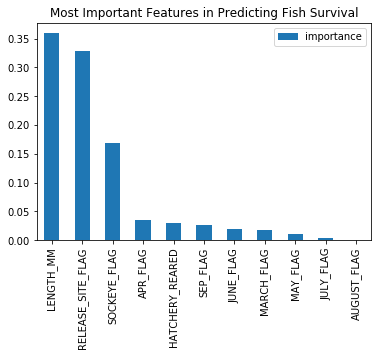

In [27]:
feature_importances = pd.DataFrame(rfc.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar',title='Most Important Features in Predicting Fish Survival')

Now, check out the raw code

In [ ]:
from fish_import import *
get_ipython().run_line_magic('matplotlib', 'inline')
IFrame('https://caltopo.com/m/SEN5', width=700, height=350)
fish = pd.read_csv('fish_capture.csv')
fish.head(7)
fish['CAPTURE_CODE'].hist()
samp = np.random.rand(len(fish)) < 0.7
x_fish = fish.iloc[:,2:]
y_train, x_train = fish['CAPTURE_CODE'][samp], x_fish[samp]
y_test, x_test = fish['CAPTURE_CODE'][~samp], x_fish[~samp]
rfc = RandomForestClassifier(100).fit(x_train,y_train)
y_predict,y_predict_proba = rfc.predict(x_test),rfc.predict_proba(x_test)
pd.concat([y_test.reset_index(),pd.Series(y_predict_proba[:,1])],ignore_index=True,axis=1).iloc[:,1:].head(10)
print('Actual Capture vs Predicted Capture Probability')
print('ROC AUC Score: >>>>> '+str(round(roc_auc_score(y_test,y_predict_proba[:,1]),2)*100)+'% <<<<< | '+'There is a '+str(round(roc_auc_score(y_test,y_predict_proba[:,1]),2)*100)+"% chance this model's prediction will correctly distinguish between captured and non-capture fish")
feature_importances = pd.DataFrame(rfc.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar',title='Most Important Features in Predicting Fish Survival')
fish[fish['RELEASE_SITE_FLAG']==1]['CAPTURE_CODE'].hist()
fish[fish['RELEASE_SITE_FLAG']!=1]['CAPTURE_CODE'].hist(alpha=0.5)

# <center> Lame!

# <center> ...Jupyter Rulez!